In [1]:
import chart_studio.plotly  as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('../../data/2014_World_GDP')
df.to_csv('../../data/2014_World_GDP.csv')

In [4]:
df.head(10)

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COUNTRY         222 non-null    object 
 1   GDP (BILLIONS)  222 non-null    float64
 2   CODE            222 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.3+ KB


In [6]:
df.describe()

,GDP (BILLIONS)
count,222.000000
mean,352.637162
std,1464.855533
min,0.010000
25%,4.615000
50%,21.525000
75%,196.200000
max,17420.000000


In [7]:
df.columns

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')

In [8]:
df.isnull().sum()

COUNTRY           0
GDP (BILLIONS)    0
CODE              0
dtype: int64

In [9]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [11]:
# top 5 highest GDP countries
df.sort_values(by='GDP (BILLIONS)', ascending=False).head(5)

,COUNTRY,GDP (BILLIONS),CODE
211,United States,17420.0,USA
42,China,10360.0,CHN
101,Japan,4770.0,JPN
75,Germany,3820.0,DEU
70,France,2902.0,FRA


In [12]:
df.sort_values(by='GDP (BILLIONS)', ascending=False).tail(5)

,COUNTRY,GDP (BILLIONS),CODE
47,Cook Islands,0.18,COK
106,Kiribati,0.16,KIR
66,Falkland Islands (Islas Malvinas),0.16,FLK
206,Tuvalu,0.04,TUV
148,Niue,0.01,NIU


In [13]:
df.sort_values(by='GDP (BILLIONS)', ascending=False).head(10)

,COUNTRY,GDP (BILLIONS),CODE
211,United States,17420.0,USA
42,China,10360.0,CHN
101,Japan,4770.0,JPN
75,Germany,3820.0,DEU
70,France,2902.0,FRA
210,United Kingdom,2848.0,GBR
27,Brazil,2244.0,BRA
99,Italy,2129.0,ITA
164,Russia,2057.0,RUS
92,India,2048.0,IND


<AxesSubplot:>

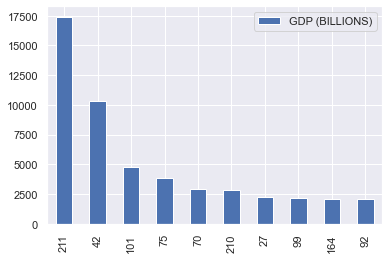

In [15]:
df.sort_values(by='GDP (BILLIONS)', ascending=False).head(10).plot(kind='bar')

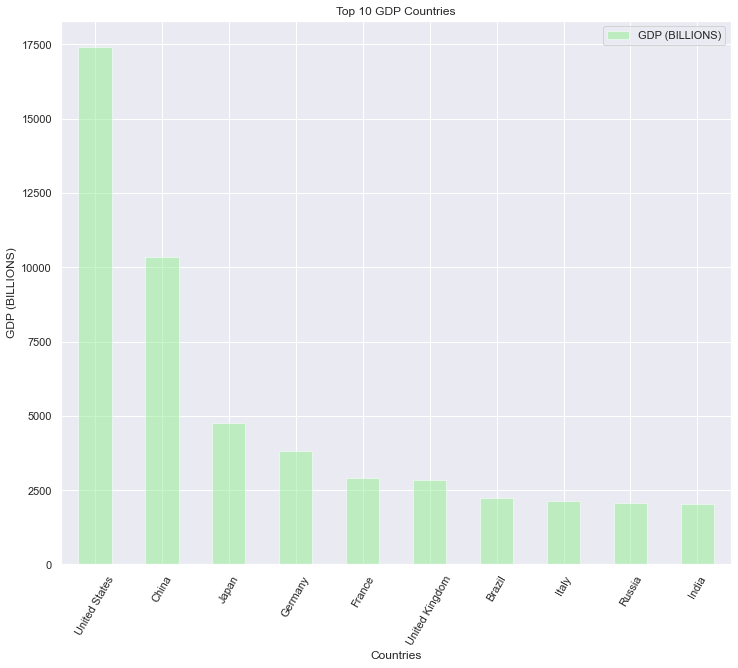

In [38]:
# show the names of countries in the x-axis instead of numbers
df.sort_values(by='GDP (BILLIONS)', ascending=False).head(10).plot(kind='bar', x='COUNTRY', figsize=(12, 10), alpha=0.5, rot=60, color='lightgreen')
plt.xlabel('Countries')
plt.ylabel('GDP (BILLIONS)')
plt.title('Top 10 GDP Countries')
plt.show()

In [44]:
data = dict(
    type='choropleth',
    locations=df['CODE'],
    z=df['GDP (BILLIONS)'],
    text=df['COUNTRY'],
    colorbar=dict(
        title='GDP (BILLIONS) US'
    )
)

layout = dict(
    title='2014 Global GDP',
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection=dict(
            type='mercator'
        )
    )
)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)
